##Challenge 1

In [22]:
import csv
from collections import OrderedDict
import random

def open_file(filename):
    with open(filename, "r") as turnstile_data:
        reader = csv.reader(turnstile_data)
        #gets rid of header
        reader.next()
        keys = []
        values = []
        for row in reader:
            if tuple(row[:4]) not in keys:
                keys.append(tuple(row[:4]))
                values.append([row[4:]])
            else:
                values[keys.index(tuple(row[:4]))].append(row[4:])
    return keys, values

keys, values = open_file("turnstile_150314.txt")

#answer : d = dict(zip(keys, values))
print keys[0]

('A002', 'R051', '02-00-00', 'LEXINGTON AVE')


##Challenge 2

In [23]:
import dateutil.parser

def trim_fat(keys, values):
    '''
    given two lists, keys and values, cleans up unwated fields in the data
    returns the two lists cleaned up
    '''
    for value in values:
        for i in xrange(len(value)):
            try:
                date = dateutil.parser.parse(value[i][2])
                entries = value[i][5].lstrip('0')
            except:
                date = 'N/A'
                entries = 'N/A'
            value[i] = [date, entries]
    return keys, values

keys, values = trim_fat(keys, values)
print values[0]
#answer : d = dict(zip(keys, values))

[[datetime.datetime(2015, 3, 14, 0, 0), '5044592'], [datetime.datetime(2015, 3, 14, 0, 0), '5044645'], [datetime.datetime(2015, 3, 14, 0, 0), '5044659'], [datetime.datetime(2015, 3, 14, 0, 0), '5044760'], [datetime.datetime(2015, 3, 14, 0, 0), '5045000'], [datetime.datetime(2015, 3, 14, 0, 0), '5045378'], [datetime.datetime(2015, 3, 15, 0, 0), '5045551'], [datetime.datetime(2015, 3, 15, 0, 0), '5045585'], [datetime.datetime(2015, 3, 15, 0, 0), '5045595'], [datetime.datetime(2015, 3, 15, 0, 0), '5045681'], [datetime.datetime(2015, 3, 15, 0, 0), '5045866'], [datetime.datetime(2015, 3, 15, 0, 0), '5046149'], [datetime.datetime(2015, 3, 16, 0, 0), '5046246'], [datetime.datetime(2015, 3, 16, 0, 0), '5046260'], [datetime.datetime(2015, 3, 16, 0, 0), '5046298'], [datetime.datetime(2015, 3, 16, 0, 0), '5046468'], [datetime.datetime(2015, 3, 16, 0, 0), '5046817'], [datetime.datetime(2015, 3, 16, 0, 0), '5047759'], [datetime.datetime(2015, 3, 17, 0, 0), '5047969'], [datetime.datetime(2015, 3, 17

##Challenge 3

In [24]:
def combine_same_days(values, sign):
    '''
    given a list of values and a sign which must be either '+' or '-'
    it returns an updated list of values where entries are combined for same days
    if sign = '+' it adds up the numbers (good for combining different turnstiles)
    if sign = '-' it takes the difference between max(entry) and min(entry) good for combining from same turnstile
    '''
    new_vals = []
    for i,value in enumerate(values):
        d = {}
        for val in value:
            if val[0] not in d.keys():
                d[val[0]] = [val[1]]
            else:
                d[val[0]].append(val[1])
        temp = []
        d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
        for k, v in d.items():
            if v[0] == '': #gets rid of blank space problems from data
                continue
            else:
                if sign == '+':
                    entries = sum(v)
                elif sign == '-':
                    entries = int(max(v)) - int(min(v))
                else:
                    print "the sign needs to be either '-' or '+'"
                temp.append([k, entries])
        values[i] = temp
    return values

values = combine_same_days(values, '-')
print values[1]

#answer : d = dict(zip(keys, values))

[[datetime.datetime(2015, 3, 14, 0, 0), 656], [datetime.datetime(2015, 3, 15, 0, 0), 505], [datetime.datetime(2015, 3, 16, 0, 0), 1262], [datetime.datetime(2015, 3, 17, 0, 0), 1220], [datetime.datetime(2015, 3, 18, 0, 0), 1256], [datetime.datetime(2015, 3, 19, 0, 0), 1267], [datetime.datetime(2015, 3, 20, 0, 0), 1279]]


##Challenge 4

[datetime.datetime(2015, 3, 14, 0, 0), datetime.datetime(2015, 3, 15, 0, 0), datetime.datetime(2015, 3, 16, 0, 0), datetime.datetime(2015, 3, 17, 0, 0), datetime.datetime(2015, 3, 18, 0, 0), datetime.datetime(2015, 3, 19, 0, 0), datetime.datetime(2015, 3, 20, 0, 0)]
[1263, 1372, 2333, 2570, 2597, 2628, 2544]


(0, 3300)

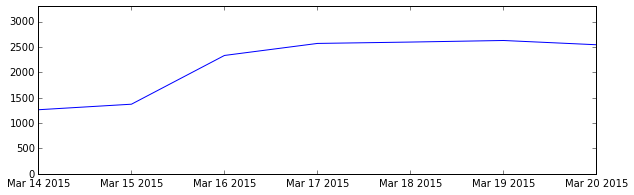

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt

rand_station = random.randint(0, len(values) - 1)

one_turnstile = values[rand_station]
dates = []
counts = []
for i in xrange(len(one_turnstile)):
    dates.append(one_turnstile[i][0])
    counts.append(one_turnstile[i][1])

print dates
print counts
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.ylim([0, 3300])

##Challenge 5

In [26]:
def combine_stations(keys, values):
    '''
    takes in two lists of keys and values
    different data for same station into one
    returns updates keys and values
    '''
    i = 0
    while i < len(values) - 2:
        station_one = keys[i][3]
        station_two = keys[i+1][3]
        if station_one == station_two:
            values[i] += values[i+1]
            del keys[i+1]
            del values [i+1]
        else:
            i += 1
    return keys, values

keys, values = combine_stations(keys, values)

print keys[1]
print '-------------------'
print values[1]

#answer : d = dict(zip(keys, values))

('A006', 'R079', '00-00-00', '5 AVE-59 ST')
-------------------
[[datetime.datetime(2015, 3, 14, 0, 0), 912], [datetime.datetime(2015, 3, 15, 0, 0), 855], [datetime.datetime(2015, 3, 16, 0, 0), 1976], [datetime.datetime(2015, 3, 17, 0, 0), 1904], [datetime.datetime(2015, 3, 18, 0, 0), 1818], [datetime.datetime(2015, 3, 19, 0, 0), 1714], [datetime.datetime(2015, 3, 20, 0, 0), 1793], [datetime.datetime(2015, 3, 14, 0, 0), 924], [datetime.datetime(2015, 3, 15, 0, 0), 799], [datetime.datetime(2015, 3, 16, 0, 0), 1273], [datetime.datetime(2015, 3, 17, 0, 0), 1877], [datetime.datetime(2015, 3, 18, 0, 0), 1829], [datetime.datetime(2015, 3, 19, 0, 0), 1917], [datetime.datetime(2015, 3, 20, 0, 0), 1767], [datetime.datetime(2015, 3, 14, 0, 0), 624], [datetime.datetime(2015, 3, 15, 0, 0), 631], [datetime.datetime(2015, 3, 16, 0, 0), 1634], [datetime.datetime(2015, 3, 17, 0, 0), 1607], [datetime.datetime(2015, 3, 18, 0, 0), 1503], [datetime.datetime(2015, 3, 19, 0, 0), 1517], [datetime.datetime(20

##Challenge 6

In [27]:
values = combine_same_days(values, '+')
print values[1]

[[datetime.datetime(2015, 3, 14, 0, 0), 8421], [datetime.datetime(2015, 3, 15, 0, 0), 8060], [datetime.datetime(2015, 3, 16, 0, 0), 17583], [datetime.datetime(2015, 3, 17, 0, 0), 20057], [datetime.datetime(2015, 3, 18, 0, 0), 18184], [datetime.datetime(2015, 3, 19, 0, 0), 18257], [datetime.datetime(2015, 3, 20, 0, 0), 17424]]


##Challenge 7

[datetime.datetime(2015, 3, 14, 0, 0), datetime.datetime(2015, 3, 15, 0, 0), datetime.datetime(2015, 3, 16, 0, 0), datetime.datetime(2015, 3, 17, 0, 0), datetime.datetime(2015, 3, 18, 0, 0), datetime.datetime(2015, 3, 19, 0, 0), datetime.datetime(2015, 3, 20, 0, 0)]
[14402, 12961, 24683, 26784, 26550, 26662, 24987]


(0, 30000)

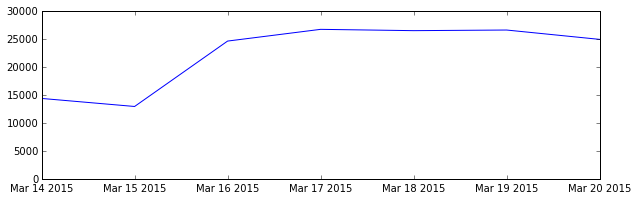

In [28]:
rand_station = random.randint(0, len(values) - 1)

one_station = values[rand_station]
dates = []
counts = []
for i in xrange(len(one_station)):
    dates.append(one_station[i][0])
    counts.append(one_station[i][1])
    
print dates
print counts

plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.ylim([0, 30000])

##Challenge 8

[5, 6, 0, 1, 2, 3, 4]


(0, 30000)

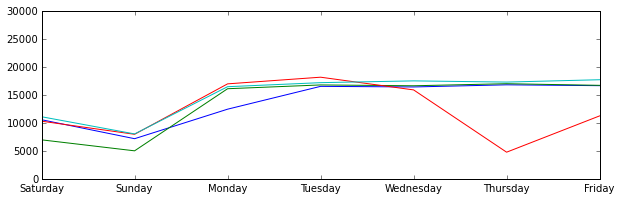

In [55]:
#getting data ready for different weeks
keys_w1, values_w1 = open_file("small_1.txt")
keys_w1, values_w1 = trim_fat(keys_w1, values_w1)
values_w1 = combine_same_days(values_w1, '-')
keys_w1, values_w1 = combine_stations(keys_w1, values_w1)
values_w1 = combine_same_days(values_w1, '+')

keys_w2, values_w2 = open_file("small_2.txt")
keys_w2, values_w2 = trim_fat(keys_w2, values_w2)
values_w2 = combine_same_days(values_w2, '-')
keys_w2, values_w2 = combine_stations(keys_w2, values_w2)
values_w2 = combine_same_days(values_w2, '+')

keys_w3, values_w3 = open_file("small_3.txt")
keys_w3, values_w3 = trim_fat(keys_w3, values_w3)
values_w3 = combine_same_days(values_w3, '-')
keys_w3, values_w3 = combine_stations(keys_w3, values_w3)
values_w3 = combine_same_days(values_w3, '+')

keys_w4, values_w4 = open_file("small_4.txt")
keys_w4, values_w4 = trim_fat(keys_w4, values_w4)
values_w4 = combine_same_days(values_w4, '-')
keys_w4, values_w4 = combine_stations(keys_w4, values_w4)
values_w4 = combine_same_days(values_w4, '+')



def int_to_weekday_name(int):
    d = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday",
        4:"Friday", 5:"Saturday", 6:"Sunday"}
    return d[int]

def plot_by_week(values):
    values = [[[date.weekday(), entries] for date, entries in value] for value in values]
    return values

plot_entries_w1 = [entries for _, entries in plot_by_week(values_w1)[0]]
plot_entries_w2 = [entries for _, entries in plot_by_week(values_w2)[0]]
plot_entries_w3 = [entries for _, entries in plot_by_week(values_w3)[0]]
plot_entries_w4 = [entries for _, entries in plot_by_week(values_w4)[0]]
plot_weekdays = [day for day, _ in plot_by_week(values_w1)[0]]

#print plot_values_w1
#print plot_values_w2
print plot_weekdays

LABELS = ['Thursday', 'Friday','Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', ]

plt.figure(figsize=(10,3))
plt.plot(plot_entries_w1)
plt.plot(plot_entries_w2)
plt.plot(plot_entries_w3)
plt.plot(plot_entries_w4)
plt.xticks(plot_weekdays, LABELS)
plt.ylim([0, 30000])

##Challenge 9 and 10

(0, 200000)

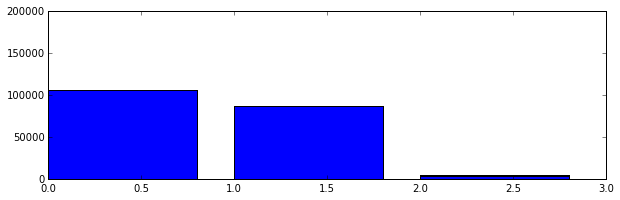

In [56]:
def get_sum_of_station_entries(values):
    total_values = [sum([entries for time, entries in value]) for value in values]
    return total_values

#this is for a small sample of stations that i used to run the code quickly. Can be change to big file
values_w1 = get_sum_of_station_entries(values_w1)
values_w2 = get_sum_of_station_entries(values_w2)
values_w3 = get_sum_of_station_entries(values_w3)
values_w4 = get_sum_of_station_entries(values_w4)

plt.figure(figsize=(10,3))
indices = range(len(values_w1))
plt.bar(indices, values_w1)
plt.bar(indices, values_w2)
plt.bar(indices, values_w3)
plt.bar(indices, values_w4)
plt.ylim([0, 200000])